In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [4]:
train.country.unique()

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [5]:
train.store.unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [6]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [7]:
x.head()

,row_id,date,country,store,product
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [8]:
x['year'] = x['date'].apply(lambda x: x.split('-')[0])
x['month'] = x['date'].apply(lambda x: x.split('-')[1])
x['day'] = x['date'].apply(lambda x: x.split('-')[2])

In [9]:
x.drop('date',axis=1,inplace=True)

In [10]:
x.head()

,row_id,country,store,product,year,month,day
0,0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,01,01
1,1,Belgium,KaggleMart,Kaggle Getting Started,2017,01,01
2,2,Belgium,KaggleMart,Kaggle Recipe Book,2017,01,01
3,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,01,01
4,4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,01,01


In [11]:
x.dtypes

row_id      int64
country    object
store      object
product    object
year       object
month      object
day        object
dtype: object

In [12]:
x[['year', 'month', 'day']] = x[['year', 'month', 'day']].astype('int')

In [13]:
x.shape

(70128, 7)

In [14]:
def repl(a,b):
  x.store.replace(a,b,inplace=True)
  test.store.replace(a,b,inplace=True)
repl('KaggleMart',0)
repl('KaggleRama',1)

In [15]:
x['country'].value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [16]:
x['product'].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [17]:
x.isnull().sum()

row_id     0
country    0
store      0
product    0
year       0
month      0
day        0
dtype: int64

In [18]:
x=pd.get_dummies(x,columns=['country'])

In [19]:
x.head()

,row_id,store,product,year,month,day,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain
0,0,0,Kaggle Advanced Techniques,2017,1,1,1,0,0,0,0,0
1,1,0,Kaggle Getting Started,2017,1,1,1,0,0,0,0,0
2,2,0,Kaggle Recipe Book,2017,1,1,1,0,0,0,0,0
3,3,0,Kaggle for Kids: One Smart Goose,2017,1,1,1,0,0,0,0,0
4,4,1,Kaggle Advanced Techniques,2017,1,1,1,0,0,0,0,0


In [20]:
sold_pro=train.groupby('product')['num_sold'].sum()

Text(0.5, 1.0, 'items sold from each product')

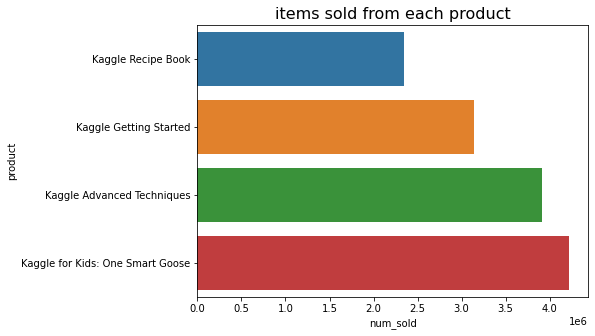

In [21]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(y=sold_pro.sort_values().index, x=sold_pro.sort_values())
ax.set_title('items sold from each product', fontdict={'fontsize':16})

In [22]:
for i in x.select_dtypes('object').columns:
    x[i], _ = x[i].factorize()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
y_pred=dt.fit(x_train,y_train).predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
m_abs_e = mean_absolute_error(y_test, y_pred)
print("Errors for Decision Tree Classifier.")
print("RMSE: ", rmse)
print('Mean absolute error: ', m_abs_e)

Errors for Decision Tree Classifier.
RMSE:  25.701724449328022
Mean absolute error:  16.62778649175341


In [26]:
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor()
y_px=ex.fit(x_train,y_train).predict(x_test)

In [27]:
rmsex = mean_squared_error(y_test, y_px, squared=False)
m_abs_ex = mean_absolute_error(y_test, y_px)
print("Errors for Extra tree Classifier.")
print("RMSE: ", rmsex)
print('Mean absolute error: ', m_abs_ex)

Errors for Extra tree Classifier.
RMSE:  22.458891659268474
Mean absolute error:  14.518865773088075


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[ 1.12979758,  1.00291733, -0.45108727, ..., -0.44745955,
        -0.44785298, -0.44683638],
       [-0.33067072,  1.00291733,  0.4428741 , ..., -0.44745955,
        -0.44785298, -0.44683638],
       [-0.99726367, -0.99709115, -0.45108727, ..., -0.44745955,
         2.2328756 , -0.44683638],
       ...,
       [-1.65833332,  1.00291733, -1.34504864, ..., -0.44745955,
        -0.44785298, -0.44683638],
       [-1.41284248,  1.00291733,  0.4428741 , ..., -0.44745955,
        -0.44785298, -0.44683638],
       [ 0.67984611, -0.99709115, -0.45108727, ..., -0.44745955,
        -0.44785298, -0.44683638]])

In [29]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=15)
rc.fit(x_train,y_train)
y_p=rc.predict(x_test)

In [30]:
rmsel = mean_squared_error(y_test, y_p, squared=False)
m_abs_el = mean_absolute_error(y_test, y_p)
print("Errors for random forest Classifier.")
print("RMSE: ", rmsel)
print('Mean absolute error: ', m_abs_el)

Errors for Extra tree Classifier.
RMSE:  28.348947364475393
Mean absolute error:  17.85065830125006


In [31]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(max_depth=5, eta=0.32867047514344655, n_estimators=226)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

[20:15:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
rmsx = mean_squared_error(y_test, xgb_pred, squared=False)
m_abs_exgb = mean_absolute_error(y_test, xgb_pred)
print("Errors for XGboost.")
print("RMSE: ", rmsx)
print('Mean absolute error: ', m_abs_exgb)

Errors for Extra tree Classifier.
RMSE:  21.607867504760858
Mean absolute error:  14.277995998230807


In [33]:
test.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,0,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,0,Kaggle Getting Started
2,70130,2021-01-01,Belgium,0,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,0,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,1,Kaggle Advanced Techniques


In [34]:
test['year'] = test['date'].apply(lambda test: test.split('-')[0])
test['month'] = test['date'].apply(lambda test: test.split('-')[1])
test['day'] = test['date'].apply(lambda test: test.split('-')[2])

In [35]:
test=pd.get_dummies(test,columns=['country'])

In [36]:
test.drop('date',axis=1,inplace=True)

In [37]:
for i in test.select_dtypes('object').columns:
    test[i], _ = test[i].factorize()

In [38]:
y_ac=xgb_model.predict(test)

In [39]:
data_set = {
    'row_id': test.row_id,
    'num_sold': y_ac
}
submission = pd.DataFrame(data_set)

In [40]:
submission.to_csv('./submission.csv', index=False)